# Análisis Exploratorio de Datos

**Proyecto:** Bootcamp MLOps Individual Project

**Autor:** Fabio Solórzano Flores

**Fecha:** 18/03/2024

---

## Descripción

En este notebook se realizará un análisis exploratorio de datos (EDA) del conjunto de datos "AIDS Clinical Trials Group Study 175". El objetivo es comprender mejor la estructura y las características de los datos antes de proceder con la creación del modelo de aprendizaje automático.

## Objetivos

1. Explorar la distribución de las variables.
2. Identificar posibles correlaciones entre las características.
3. Detectar valores atípicos o datos faltantes.
4. Obtener información relevante para la selección y preparación de características.

## Conjunto de Datos

El conjunto de datos utilizado en este análisis es el siguiente:

- **Nombre:** AIDS Clinical Trials Group Study 175
- **Descripción:** Este conjunto de datos contiene estadísticas de atención médica e información categórica sobre pacientes diagnosticados con SIDA. La tarea de predicción consiste en predecir si cada paciente murió dentro de cierto período de tiempo o no.

---


Primero importamos los paquetes que usaremos:

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

Este dataset cuenta con un servicio de integración con python para importar los datos de manera sencilla

In [2]:
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890)

De esta información podemos también revisar la metadata para contextualizar nuestro análisis exploratorio

In [3]:
metadata = aids_clinical_trials_group_study_175.metadata
display(HTML(metadata.abstract))

In [4]:
display(HTML(metadata.additional_info.purpose))

In [5]:
display(HTML(metadata.additional_info.variable_info))

Nos da tambien una descripcion nuestras variables

In [6]:
variables_info =aids_clinical_trials_group_study_175.variables
display(variables_info)

,name,role,type,demographic,description,units,missing_values
0,pidnum,ID,Integer,None,Patient ID,None,no
1,cid,Target,Binary,None,"censoring indicator (1 = failure, 0 = censoring)",None,no
2,time,Feature,Integer,None,time to failure or censoring,None,no
3,trt,Feature,Integer,None,treatment indicator (0 = ZDV only; 1 = ZDV + d...,None,no
4,age,Feature,Integer,Age,age (yrs) at baseline,None,no
5,wtkg,Feature,Continuous,None,weight (kg) at baseline,None,no
6,hemo,Feature,Binary,None,"hemophilia (0=no, 1=yes)",None,no
7,homo,Feature,Binary,Sexual Orientation,"homosexual activity (0=no, 1=yes)",None,no
8,drugs,Feature,Binary,None,"history of IV drug use (0=no, 1=yes)",None,no
9,karnof,Feature,Integer,None,Karnofsky score (on a scale of 0-100),None,no


Revisando esta descripción detenidamente podemos ver que race está mal catalogada y en realidad es Binary

Ahora ya podemos concentrarnos en la data y para comenzar visualizaremos nuestras primeras filas

In [7]:
data = aids_clinical_trials_group_study_175.data.original
data.head(10)


,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,10056,0,948,2,48,89.8128,0,0,0,100,...,0,0,1,0,1,0,422,477,566,324
1,10059,1,1002,3,61,49.4424,0,0,0,90,...,0,1,3,0,1,0,162,218,392,564
2,10089,0,961,3,45,88.4520,0,1,1,90,...,1,1,3,0,1,1,326,274,2063,1893
3,10093,0,1166,3,47,85.2768,0,1,0,100,...,1,1,3,0,1,0,287,394,1590,966
4,10124,0,1090,0,43,66.6792,0,1,0,100,...,1,1,3,0,0,0,504,353,870,782
5,10140,0,1181,1,46,88.9056,0,1,1,100,...,1,1,3,0,1,0,235,339,860,1060
6,10165,1,794,0,31,73.0296,0,1,0,100,...,1,1,3,0,0,0,244,225,708,699
7,10190,0,957,0,41,66.2256,0,1,1,100,...,1,1,3,0,0,0,401,366,889,720
8,10198,1,198,3,40,82.5552,0,1,0,90,...,1,1,3,1,1,1,214,107,652,131
9,10229,1,188,0,35,78.0192,0,1,0,100,...,1,1,3,0,0,1,221,132,221,759


Parece que en efecto nuestras variables son lo que indica la descripcion, solo wtkg es continua y a exepcion de race, las columnas están bien catalogadas. Aprovechemos estas categorias para separar el dataset y llevar análisis más adecuados por separado.

In [8]:
types = variables_info.type.unique()
col_dict={i:variables_info[variables_info.type==i]['name'].to_list() for i in types}

# quitamos el id
col_dict['Integer'].remove('pidnum')

#cambiamos race de categoría
col_dict['Integer'].remove('race')
col_dict['Binary'].append('race')

data_by_type={k:data[col_dict[k]] for k in col_dict}


Comencemos por las Continuas ya que simplemente es una, podemos usar la función describe y graficar un histograma para entender la distribución de nuestros datos:

,wtkg
count,2139.000000
mean,75.125311
std,13.263164
min,31.000000
25%,66.679200
50%,74.390400
75%,82.555200
max,159.939360


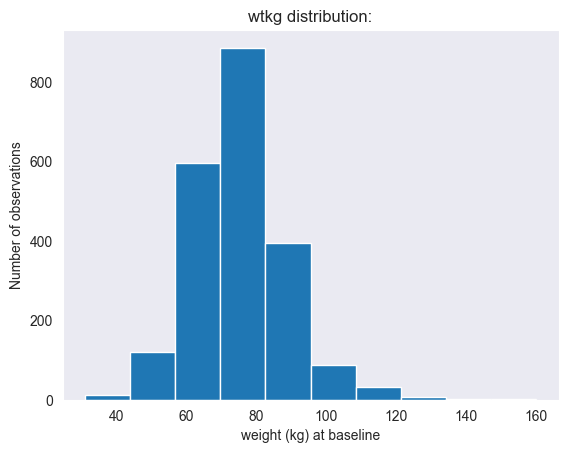

In [9]:
def continuous_exploration(df:pd.DataFrame)->None:
    display(df.describe())
    for col in df.columns:
        plt.hist(df[col])
        plt.grid()
        plt.title(f"{col} distribution:")
        plt.ylabel("Number of observations")
        plt.xlabel(variables_info[variables_info.name==col].description.values[0])
        plt.show()

continuous_exploration(data_by_type['Continuous'])


Podemos ver que se asemeja a una distribución normal y que hay un outlier en 159 que podríamos quitar usando valor atípico

Continuemos con las variables binarias: Debido a que estas son más, graficaremos los histogramas en varias columnas.

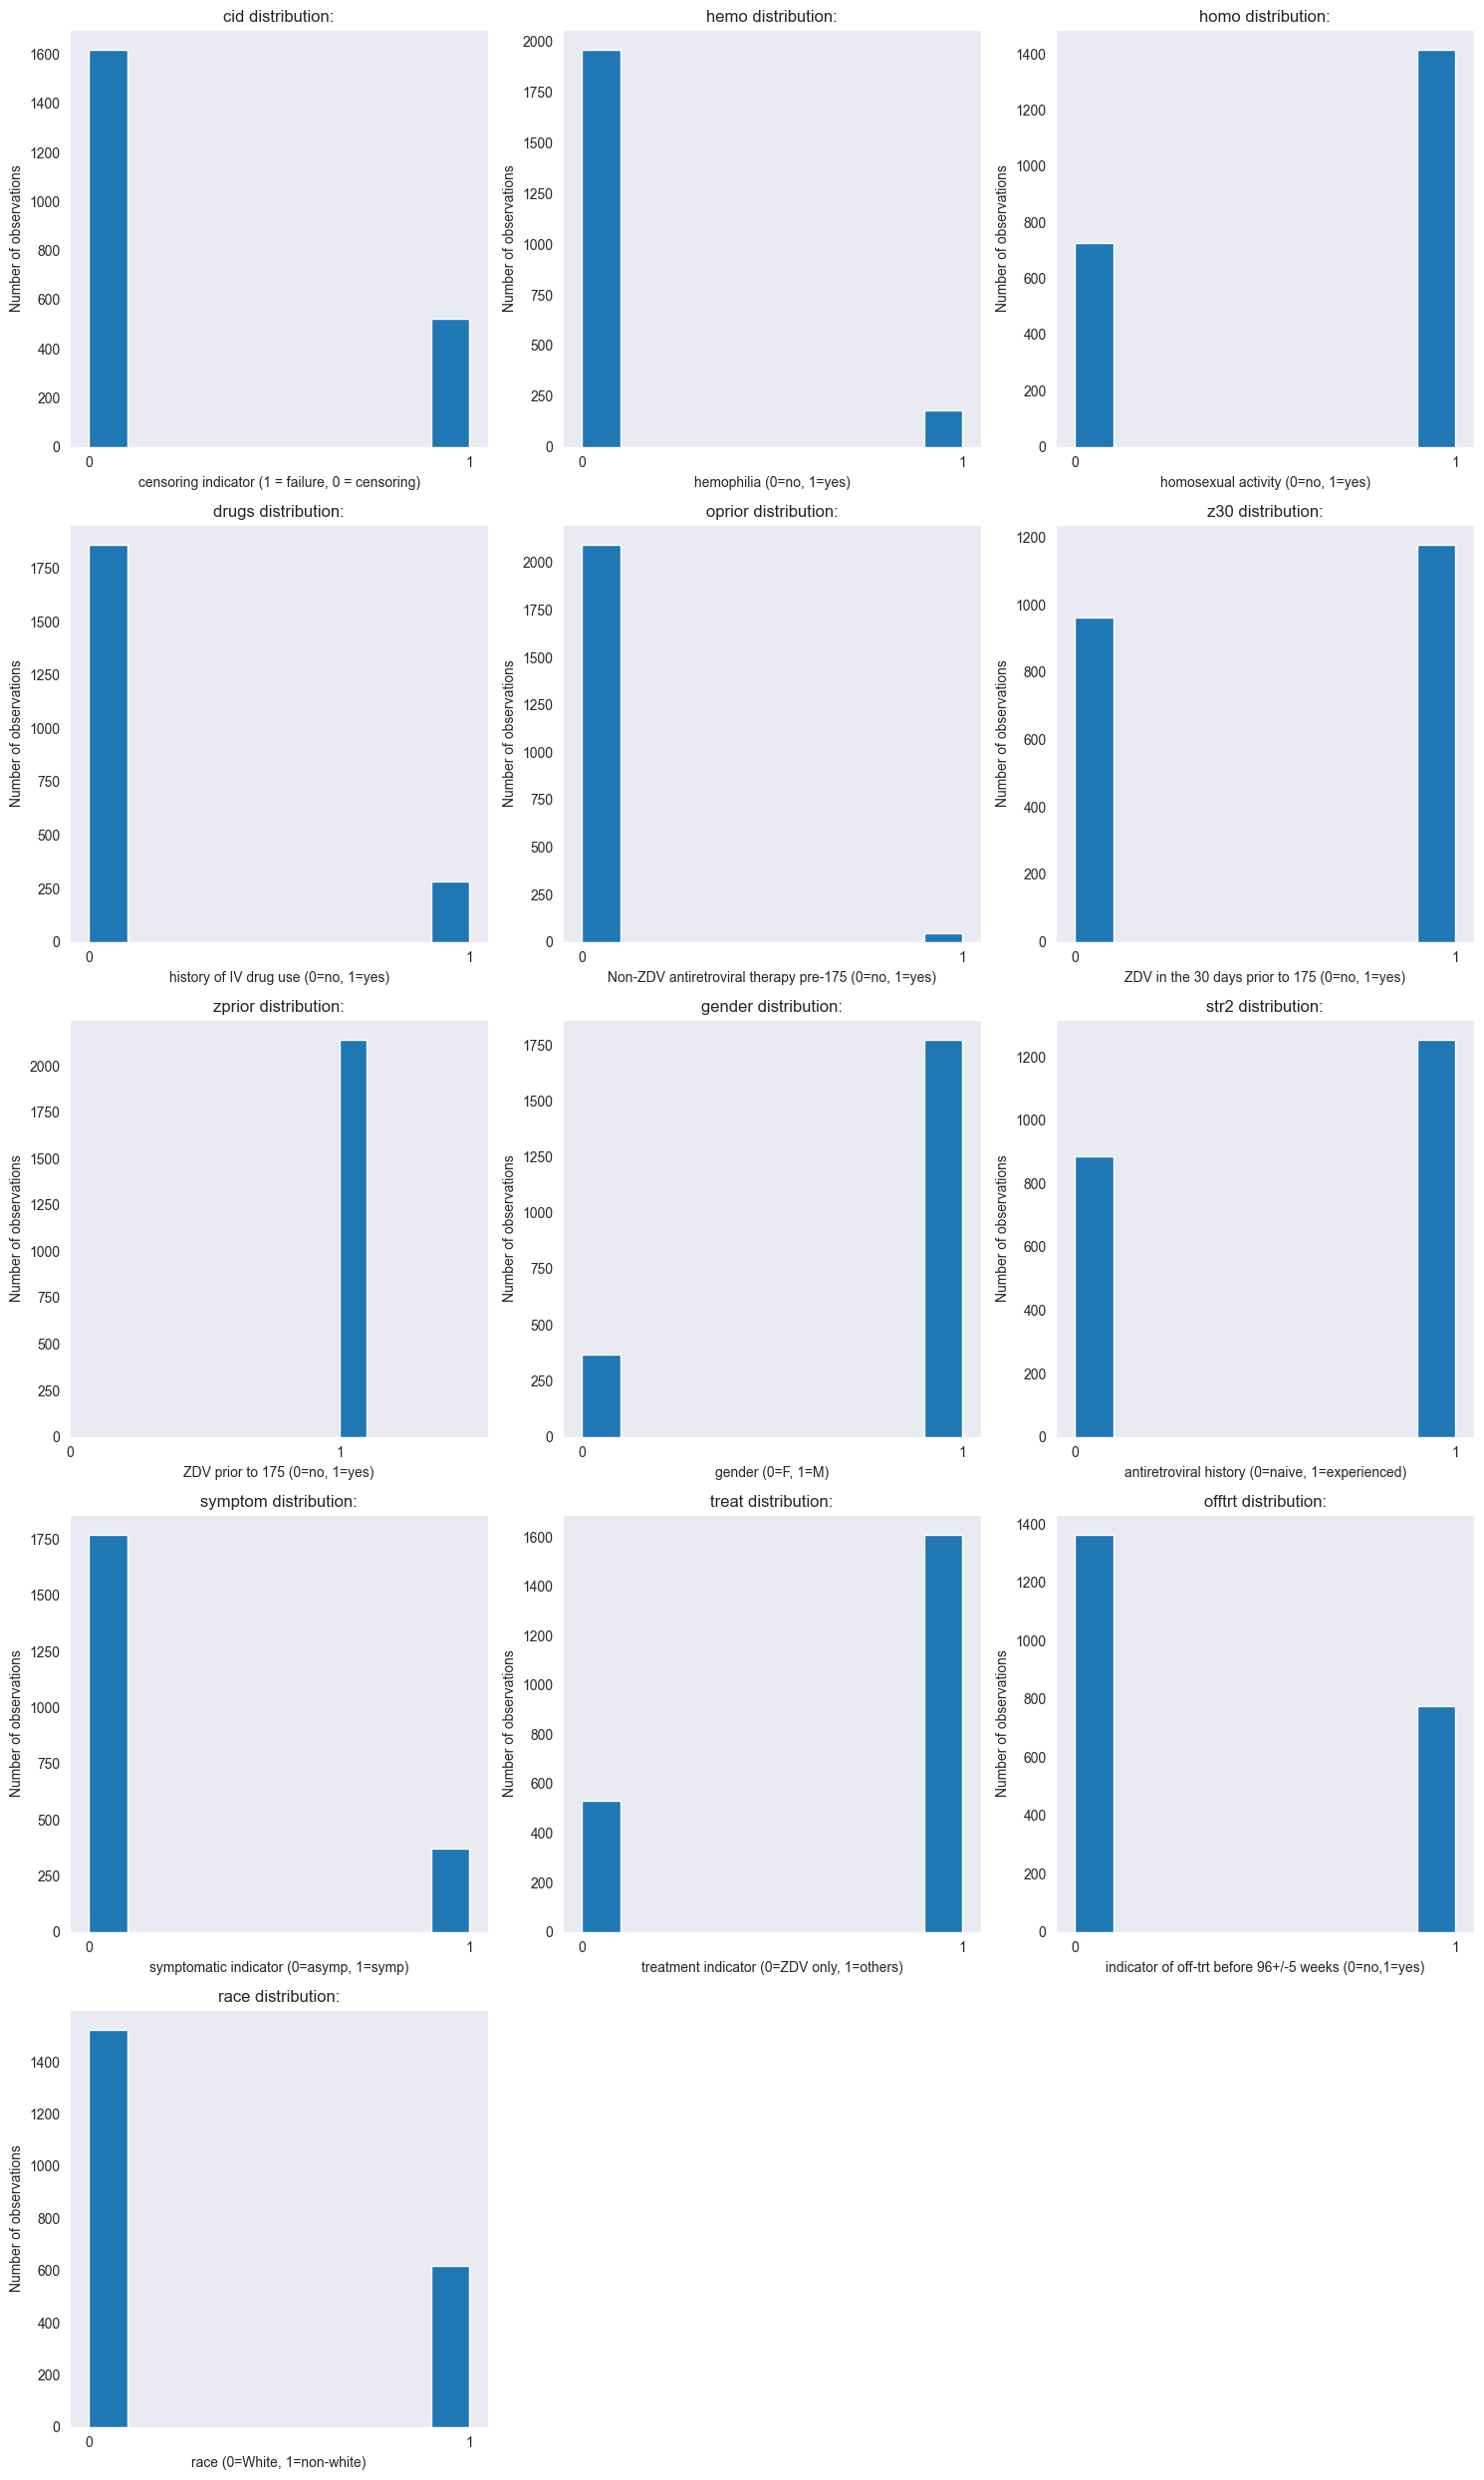

In [15]:

def binary_exploration(df: pd.DataFrame) -> None:
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 3)  # Adjust 3 according to your preference for the number of columns per row
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

    # Flatten axes if necessary
    if num_rows == 1:
        axes = axes.reshape(1, -1)

    for i, col in enumerate(df.columns):
        # Calculate subplot position
        row_idx = i // 3
        col_idx = i % 3

        # Plot histogram
        axes[row_idx, col_idx].hist(df[col])
        axes[row_idx, col_idx].grid()
        axes[row_idx, col_idx].set_title(f"{col} distribution:")
        axes[row_idx, col_idx].set_ylabel("Number of observations")
        axes[row_idx, col_idx].set_xlabel(variables_info[variables_info.name==col].description.values[0])
        axes[row_idx, col_idx].set_xticks([0, 1])

    # Remove empty subplots
    for i in range(num_cols, num_rows * 3):
        row_idx = i // 3
        col_idx = i % 3
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()



binary_exploration(data_by_type['Binary'])


De estos histogramas podemos concluir que la variable zprior no nos brinda información relevante ya que en todos los casos el valor es 1, otro detalle que notar es que la proporcion de valores en la variable oprior es demasiado desbalanceada por lo que tal vez lo más conveniente sea deshecharla y en cuanto a las variables drugs, hemo, gender y symptom hay que evaluar deshacernos de filas para mejorar esas proporciones

El siguiente estudio que haremos es el de las variables Integer

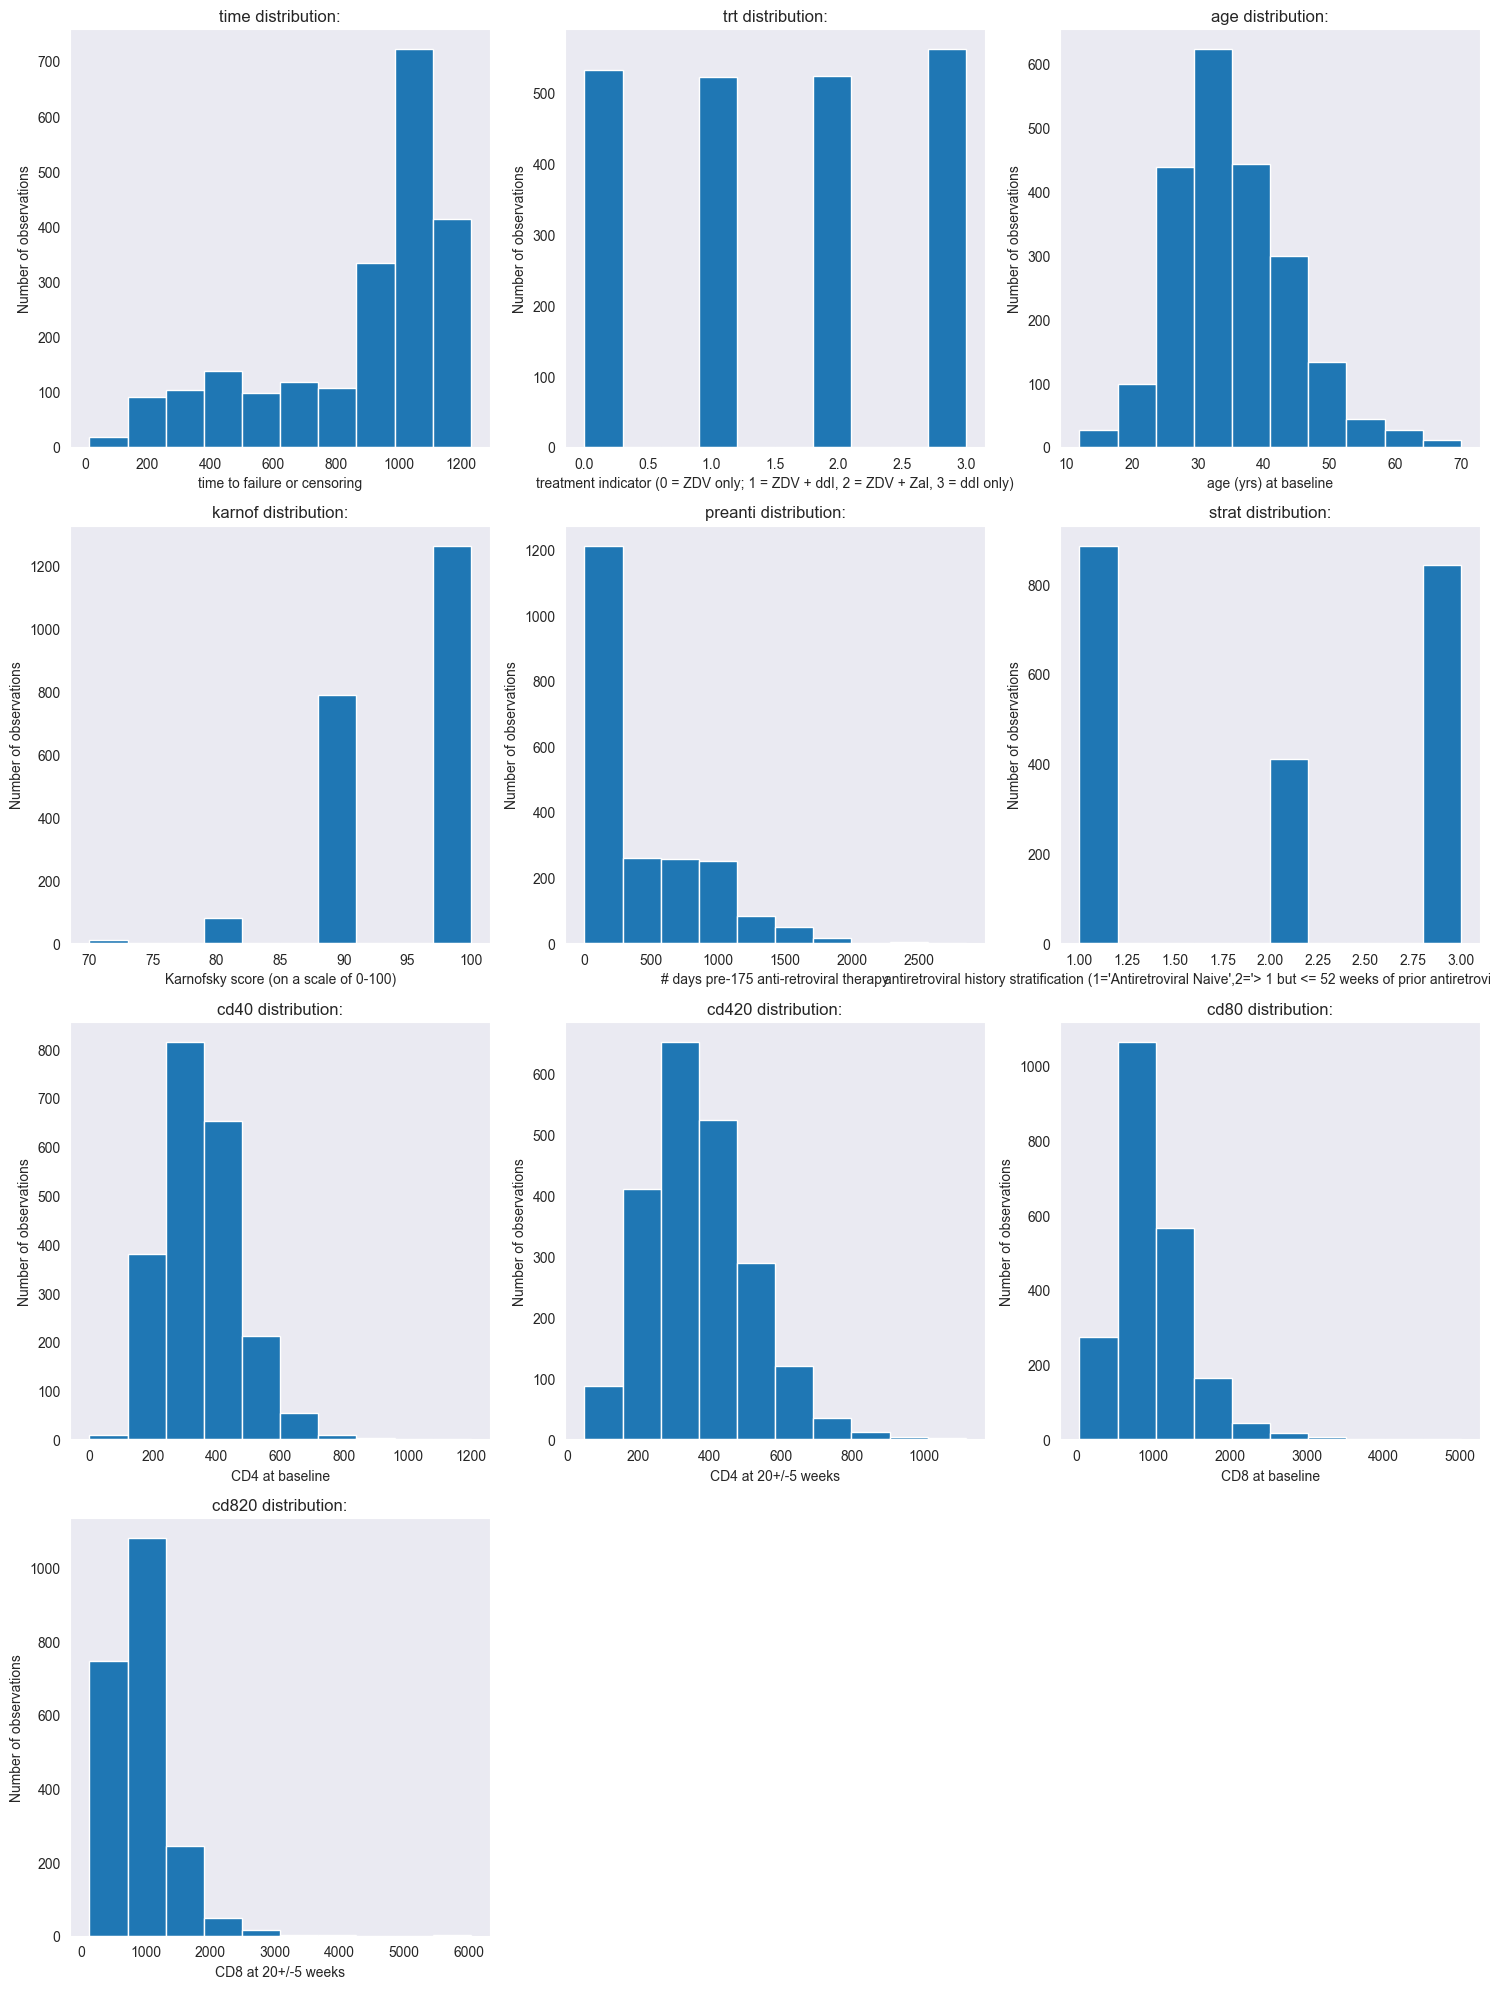

In [16]:
def int_exploration(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 3)  # Adjust 3 according to your preference for the number of columns per row
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

    # Flatten axes if necessary
    if num_rows == 1:
        axes = axes.reshape(1, -1)

    for i, col in enumerate(df.columns):
        # Calculate subplot position
        row_idx = i // 3
        col_idx = i % 3

        # Plot histogram
        axes[row_idx, col_idx].hist(df[col])
        axes[row_idx, col_idx].grid()
        axes[row_idx, col_idx].set_title(f"{col} distribution:")
        axes[row_idx, col_idx].set_ylabel("Number of observations")
        axes[row_idx, col_idx].set_xlabel(variables_info[variables_info.name==col].description.values[0])

    # Remove empty subplots
    for i in range(num_cols, num_rows * 3):
        row_idx = i // 3
        col_idx = i % 3
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()
int_exploration(data_by_type['Integer'])

Al revisar estos histogramas encontramos que strat y trt son variables categóricas y de relativamente pocas categorías por lo que son buenos candidatos para one-hot encoding, podría parecer que karnof también lo es pero la repetición de valores probablemente se deba a un sesgo humano, además estos valores son ordinales por lo que lo mejor será tratarlos como al resto de variables. En cuanto a las variables que no mencioné, estas tienen en común que son conteos de cosas, aquellas que son conteos de Linfocitos parecen seguir distribuciones exponenciales por lo que podemos hacerles una transformación logarítmica para suavizar las diferencias. Por otro lado, la variable age podemos pensar en normalizarla o al menos escalarla. Y en cuanto a preanti y time have falta inspeccionarlas mejor

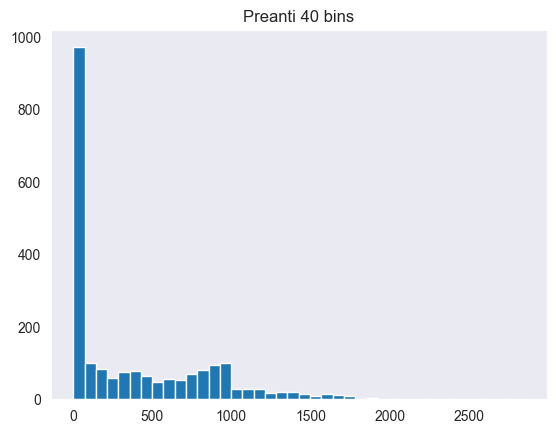

873 de 2139 son ceros


In [17]:
plt.hist(data.preanti,40)
plt.title("Preanti 40 bins")
plt.grid()
plt.show()
print(f"{sum(data.preanti==0)} de {len(data)} son ceros")

debido a la alta cantidad de ceros es complicado aplicar transformaciones, podemos pensar en agruparla en bins de 0, 1-1000 y >1000 para convertirla en categórica (y aplicar one hot encoding) o en binaria con bins de 0 y >0 u otro acercamiento podría ser eliminarla

Ahora visualicemos la variable time

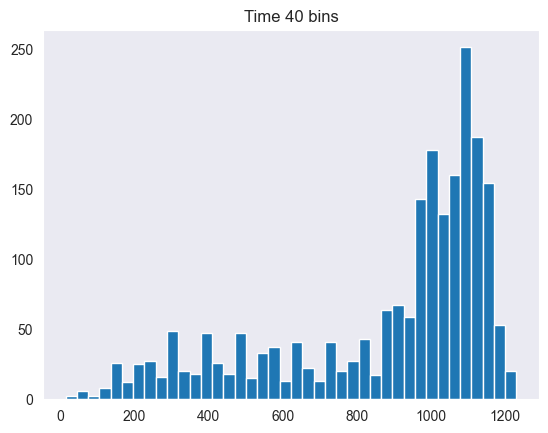

In [13]:
plt.hist(data.time,40)
plt.title("Time 40 bins")
plt.grid()
plt.show()

Esta variable parece seguir una distribución compleja lo cual va a ser dificil de interpretar para nuestro modelo pero no nos podemos dar el lujo de perder información ya que esta es una de nuestras variables más importantes.
Un acercamiento experimental puede ser asumir que esta variable es producto de la convolusion entre otras dos variables y tratar de encontrar el kernel para deconvolusionar y convertir en dos variables pero esto puede hacer muy lento y complejo el preprocesamiento asi que me parece más apropiado separar esta variable dos a partir de un threshold como lo haríamos si quisieramos convertir en bins pero en lugar de hacer onehot encoding podemos normalizar los valores, la parte superior asumiendo que es normal y la inferior asumiendo que es uniforme.


Con este análisis se hizo una primera versión de nuestro pipeline En el que utilizando distintas tecnicas todas las variables se logran llevar al rango de 0-1 y nuestro dataset contiene ahora 28 variables

In [18]:
from pipelines import preprocessor_beta,preprocessor,clean_data
clean_data = clean_data(data)

def plot_correlations(arr:np.array):
    corr_matrix = np.corrcoef(arr, rowvar=False)
    plt.figure(figsize=(10, 8))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Correlation')
    plt.title('Correlation Plot')
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.show()

y=clean_data['cid']
X=clean_data.drop(['cid'],axis=1)

preprocessor_beta

ColumnTransformer(transformers=[('binary', 'passthrough',
                                 ['hemo', 'homo', 'drugs', 'z30', 'gender',
                                  'str2', 'symptom', 'treat', 'offtrt',
                                  'race']),
                                ('time',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('custom',
                                                  CustomTimeTransformer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['time']),
                                ('oh',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['trt', 'strat']),
                                ('m...
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['age', 'wtkg']),
                                ('linfo',
                                 Pipeline(steps=[('log_minmax_transform',
                                                  LogTransformer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cd40', 'cd420', 'cd80', 'cd820']),
                                ('karnof',
                                 Pipeline(steps=[('transformer',
                                                  KarnofTransformer())]),
                                 ['karnof']),
                                ('preanti',
                                 Pipeline(steps=[('binning',
                                                  PreantiTransformer()),
                                                 ('onehot', OneHotEncoder())]),
                                 ['preanti'])])

Con este nuevo dataset podemos evaluar las correlaciones que tienen todas las variables para así entender cuales aportan información al modelo y cuales no

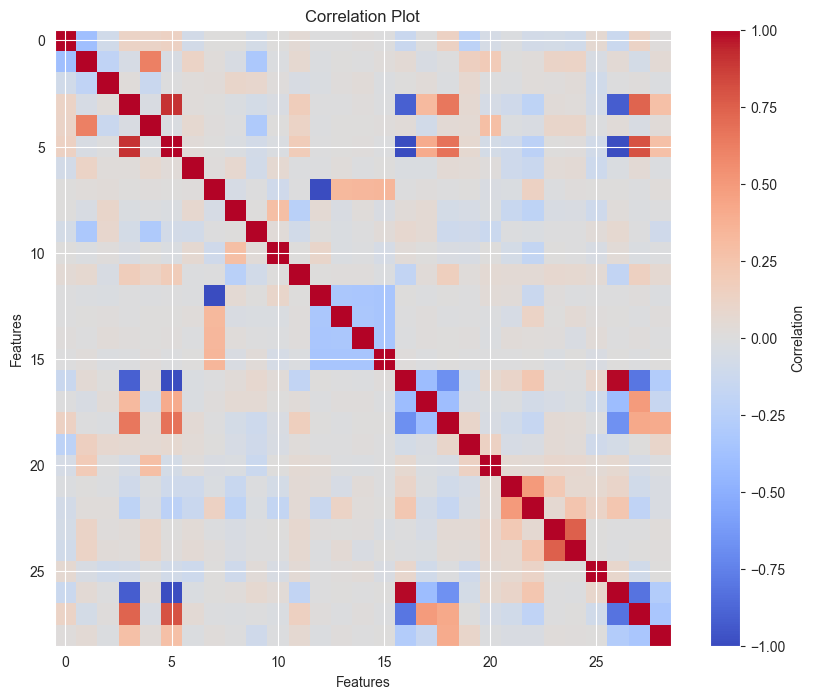

In [19]:
X_preprocessed_beta=preprocessor_beta.fit_transform(X)
plot_correlations(X_preprocessed_beta)

Al ver esta matriz de correlaciones podemos ver que las variables 16,17 y 18 muestran correlaciones fuertes con la 5, 3, 26, 27 y 28. Estas variables (16, 17 y 18) provienen de la variable strat por lo que se hizo una version definitiva del pipeline de preprocesamiento en el que se omite esta variable.

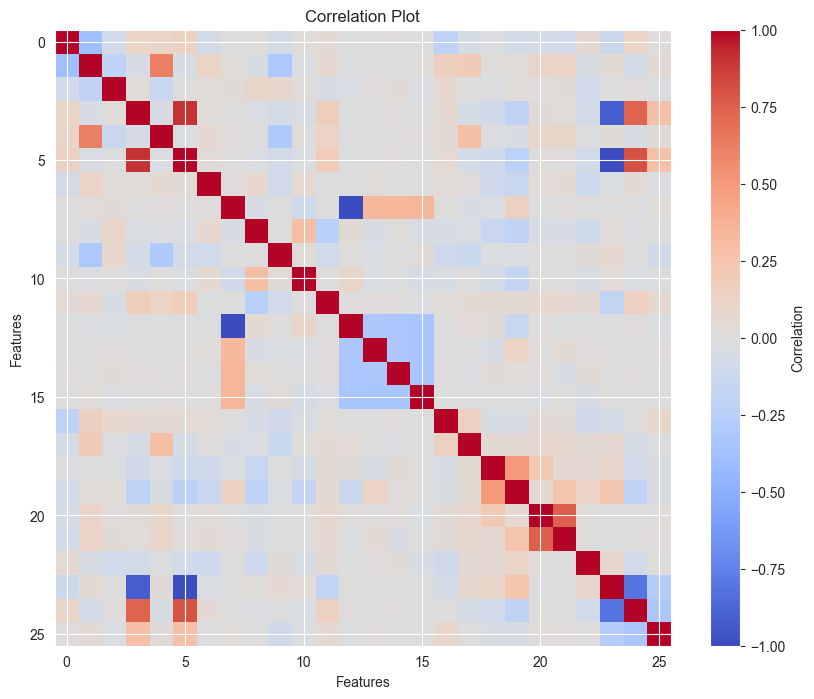

In [20]:
X_preprocessed=preprocessor.fit_transform(X)
plot_correlations(X_preprocessed)


En esta nueva version ya no vemos las correlaciones antes mencionadas y podemos continuar a la seleccion del modelo